In [167]:
#Set up
import string
import numpy as np
import pandas as pd
import requests
import seaborn as sns


**Tasks executed in this file:**

Analysis 1:
1) Create get_tokens function that takes in text file, and returns cleaned, tokenized works <br>
2) Use get_tokens function to extract tokens from 5 provided news sources <br>
3) Create tokens_to_dtm function that converts tokens to dtm <br>
4) Use tokens_to_dtm to get dtms for each news source <br>
5) Append dtms into one large matrix with all news sources <br>
6) Define cosine function to calculate cosine between vectors <br>
7) Extract vectors from dtm matrix <br>
8) Test cosine function on two news vectors <br>
9) After testing function, apply cos function to entire DTM appended matrix <br>
10) Display matrix as a heatmap and analyze results <br>

Analysis 2:
1) Define function remove_stop to remove stop words from token list <br>
2) Apply remove_stop to news source token lists <br>
3) Use tokens_to_dtm function from Part 1 to convert new, clean lists to dtms <br>
4) Append DTMs into one large matrix with al news sources <br>
5) Apply cosine function to entire DTM appended matrix <br>
6) Display new matrix (without stopwords) and analyze results <br>


In [168]:
#Create a function that takes in a text file and returns tokenized text

def get_tokens(txtFile):
    '''
    Extracts tokenized text from text file
    Arguments:
        - txtFile: a text file with extracted text from a url
    Output:
        - cleanList: a list of tokenized text
    '''
    
    #open text file & read text into var1
    fileTemp = open(txtFile)
    var1 = fileTemp.read()
    
    #close text file
    fileTemp.close()
    
    #remove punctuation from text file
    cleantxt = var1.translate(str.maketrans('', '', string.punctuation))
    
    #remove slanted quotes (not included in built-in string punctuation)
    cleantxt = cleantxt.replace('“','')
    cleantxt = cleantxt.replace('”','')
    cleantxt = cleantxt.replace("’",'')
    
    #use translation table to map digits to None
    translation_table = str.maketrans('', '', string.digits)

    #delete all numbers
    cleantxt = cleantxt.translate(translation_table)
    
    #switch remaining text to all lower
    cleantxt = cleantxt.lower()
    
    #break up text into words
    cleanList = cleantxt.split()
    
    #return clean text
    return cleanList


In [169]:

#Get tokenized text from all text files
aljText = get_tokens("aljazeera-khashoggi.txt")
bbcText = get_tokens("bbc-khashoggi.txt")
brbText = get_tokens("breitbart-khashoggi.txt")
cnnText = get_tokens("cnn-khashoggi.txt")
foxText = get_tokens("fox-khashoggi.txt")

#Show example of function working
aljText[1:10]

['istanbul',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'has',
 'said',
 'the']

In [170]:

#Create a function that converts token list to a dtm
#Utilizes logic from 11/3 class
def tokens_to_dtm(tokenList):
    '''
    Creates dtm from tokenized text
    Arguments:
        - tokenList: a cleaned list of tokens from a txt file
    Output:
        - dtm: a dataframe document term matrix of number of occurences of each token
    '''
    
    #create empty dictionary
    dtm = dict()
    
    for token in tokenList:
        #count instances
        if token in dtm:
            dtm[token][0] += 1
        #if new term, add to dictionary with 1 instance
        else:
            dtm[token] = [1]

    #return data frame
    return pd.DataFrame(dtm)



In [171]:
#Get DTMs from each news source
aljDict = tokens_to_dtm(aljText)
bbcDict = tokens_to_dtm(bbcText)
brbDict = tokens_to_dtm(brbText)
cnnDict = tokens_to_dtm(cnnText)
foxDict = tokens_to_dtm(foxText)

#Show example of dtm
aljDict

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,has,said,the,...,saudis,know,very,well,knows,doing,namely,asking,full,cooperation
0,4,5,7,4,1,1,12,6,6,38,...,2,1,1,1,1,1,1,1,1,1


In [172]:
#Concatenate all DTMs to view as full matrix
newDict = aljDict.append(bbcDict).append(brbDict).append(cnnDict).append(foxDict)
newDict

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,has,said,the,...,tonight,tomorrow,rally,texas,greg,palkot,associated,press,contributed,report
0,4,5,7,4,1,1,12,6,6,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,4,5,8,2,2,9,8,8,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,4,6,5,1,1,4,5,4,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,4,2,1,1,1,5,2,1,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,3,3,1,1,13,1,13,42,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [173]:
#Save as data frame
df = pd.DataFrame(newDict)

#Clean up indices, NAs
df.index=["Aljazeera", "BBC", "Breitbart", "CNN", "Fox"]
df = df.fillna(0)

#display
df

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,has,said,the,...,tonight,tomorrow,rally,texas,greg,palkot,associated,press,contributed,report
Aljazeera,4,5,7,4,1,1,12,6,6,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBC,2,4,5,8,2,2,9,8,8,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breitbart,1,4,6,5,1,1,4,5,4,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNN,3,4,2,1,1,1,5,2,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fox,1,2,3,3,1,1,13,1,13,42,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [174]:
#Define function to calculate cosine similarity between vectors
#Utlizies logic from 11/3 class
def cosine(a,b):
    '''
    Calculates the cosine between two vectors (a&b)
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos


In [175]:
#extract vectors from DTM above 
aljVec = df.iloc[0].values
bbcVec = df.iloc[1].values
brbVec = df.iloc[2].values
cnnVec = df.iloc[3].values
foxVec = df.iloc[4].values

#Display example vector
aljVec[1:10]

array([ 5.,  7.,  4.,  1.,  1., 12.,  6.,  6., 38.])

In [176]:
#Test cosine function on two news sources
print(cosine(aljVec, bbcVec))
print(cosine(cnnVec, foxVec))

#We would expect similarities between Aljazeera and BBC to be higher than similarity between CNN and Fox. 
#These will also be slightly inflated due to the inclusion of stop words 

0.8710533947434904
0.7397379569816138


In [177]:
#Now that we have tested the function, apply it to the full data frame
cosDF = df.transpose().corr(method=cosine)

#Display resulting cosine DF
cosDF

,Aljazeera,BBC,Breitbart,CNN,Fox
Aljazeera,1.000000,0.871053,0.840099,0.734947,0.844945
BBC,0.871053,1.000000,0.899075,0.744003,0.888940
Breitbart,0.840099,0.899075,1.000000,0.681502,0.867844
CNN,0.734947,0.744003,0.681502,1.000000,0.739738
Fox,0.844945,0.888940,0.867844,0.739738,1.000000


<AxesSubplot:>

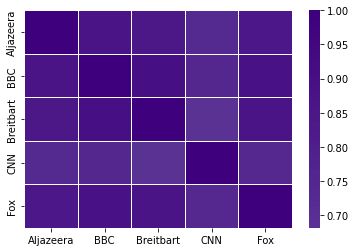

In [178]:
#Generate heatmap calculating cosine similarity
sns.heatmap(cosDF, center=0,linewidths=.5,cmap="Purples")

This wasn't terribly helpful - likely because stop words were included in this analysis. This drove cosine similarity up, by basing similarities off of key words that have little meaning or affect on overall message. By removing stop words, we would expect to see more distinctive patterns and less similarity between certain news sources. 

In [179]:
#Define stopWords using csv provided
stopWordDf = pd.read_csv("stop_words.csv")
stopWords = stopWordDf["word"].to_list()

#Display sample
stopWords[1:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [180]:
#Define function to remove stop words from token list
def remove_stop(tokenList):
    '''
    Removes stop words from tokenized list
    Arguments:
        - tokenList: a cleaned list of tokens from a txt file
    Output:
        - cleanList: tokenList without stopwords
    
    '''
    cleanList = [word for word in tokenList if word not in stopWords]
    return cleanList

#Test function
remove_stop(aljText)[1:10]

['istanbul',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'murder',
 'journalist',
 'jamal']

In [181]:
#Get NEW DTMs from each news source
aljDict2 = tokens_to_dtm(remove_stop(aljText))
bbcDict2 = tokens_to_dtm(remove_stop(bbcText))
brbDict2 = tokens_to_dtm(remove_stop(brbText))
cnnDict2 = tokens_to_dtm(remove_stop(cnnText))
foxDict2 = tokens_to_dtm(remove_stop(foxText))

#Show example of new dtm
aljDict2

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,murder,journalist,jamal,...,aljubeir,terrible,tragedy,taha,ozhan,research,director,institute,saudis,cooperation
0,4,5,7,4,1,1,12,6,1,1,...,1,1,1,1,1,1,1,1,2,1


In [182]:
#append dtms into new Full DTM
newDict2 = aljDict2.append(bbcDict2).append(brbDict2).append(cnnDict2).append(foxDict2)

#Define as data frame
df2 = pd.DataFrame(newDict2)

#Clean up indices, NAs
df2.index=["Aljazeera", "BBC", "Breitbart", "CNN", "Fox"]
df2 = df2.fillna(0)

#display
df2

,turkey,istanbul,turkish,president,recep,tayyip,erdogan,murder,journalist,jamal,...,coming,tonight,tomorrow,rally,texas,greg,palkot,press,contributed,report
Aljazeera,4,5,7,4,1,1,12,6,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBC,2,4,5,8,2,2,9,6,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breitbart,1,4,6,5,1,1,4,3,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNN,3,4,2,1,1,1,5,1,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fox,1,2,3,3,1,1,13,6,0.0,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [183]:
#Now that we have tested the function, apply it to the full data frame
cosDF2 = df2.transpose().corr(method=cosine)

#Display resulting cosine DF
cosDF2

,Aljazeera,BBC,Breitbart,CNN,Fox
Aljazeera,1.000000,0.679561,0.601877,0.532990,0.693905
BBC,0.679561,1.000000,0.597949,0.502923,0.643700
Breitbart,0.601877,0.597949,1.000000,0.378377,0.551368
CNN,0.532990,0.502923,0.378377,1.000000,0.532516
Fox,0.693905,0.643700,0.551368,0.532516,1.000000


<AxesSubplot:>

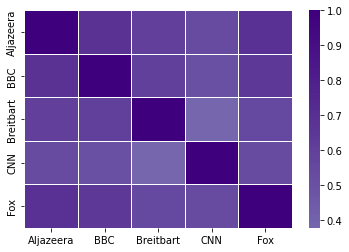

In [184]:
#Generate new heatmap
sns.heatmap(cosDF2, center=0,linewidths=.5,cmap="Purples")

This new heatmap is much more representative of the anticipated relationship between news sources. Cosine similarity is still high (which makes sense - the stories do cover the same issue) but the differences between verbiage are more distinct. As expected, CNN and Fox demonstrate a comparitively low level of cosine similarity. That said, Breitbart and CNN show the least similarity, while Aljazeera and Fox demonstrate the most. In furthering this analysis, it would be wise to incorporate a level of sentiment analysis to further determine how news outlets differ in attitude. This could be done through more complicated embeddings, or including stop words that have positive versus negative connotations (perhaps words like less, don't, greatest, important, all of which were in our stop word list). 